<a href="https://colab.research.google.com/github/HongEnJung/ML-DL/blob/main/scikit_learn_classification(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisonTree Classifier 생성(CART)
dt_clf = DecisionTreeClassifier(random_state=156) #max_depth=3, min_samples_split=4, min_samples_leaf=4

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [49]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names = iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled =True)

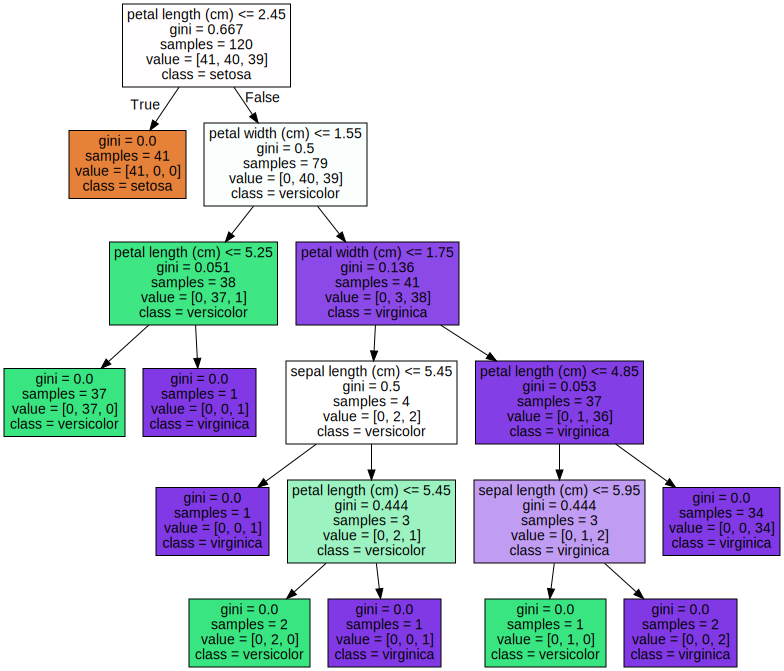

In [50]:
import graphviz

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

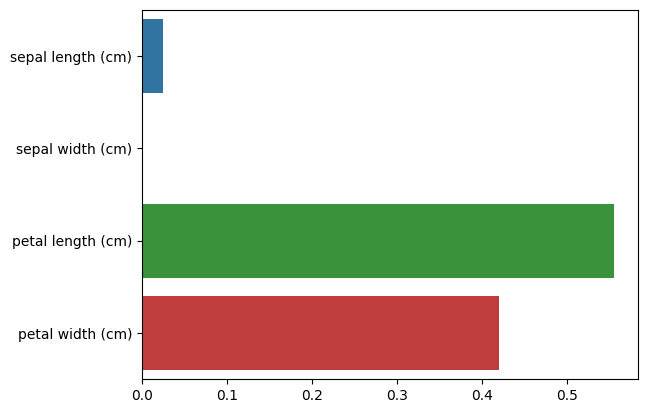

In [51]:
from ast import increment_lineno
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
# 예측결과에 얼마나 중요한 역할을 하는지
print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# feature_importances_ 값은 0과 1 사이의 실수로 표현되며, 전체 특성들의 중요도의 합은 1입니다.
# 이 값이 높을수록 해당 특성이 예측에 큰 영향을 미친다는 의미입니다.

In [52]:
# permutation_importance 모델의 예측에 얼마나 민감하게 반응하는지를 평가
# 모델의 특성 선택, 차원 축소, 모델 해석 등에 활용
# feature importance와 달리 어떤 종류의 모델이든 사용 가능

petal length (cm) 0.533 ± 0.045
petal width (cm) 0.101 ± 0.022
sepal length (cm) 0.023 ± 0.012
sepal width (cm) 0.000 ± 0.000


<Axes: >

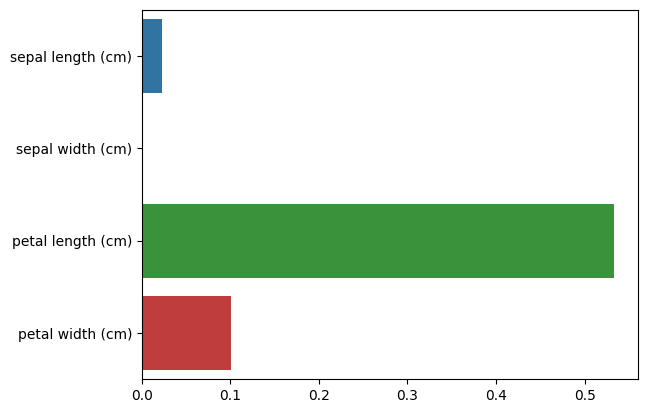

In [53]:
from sklearn.inspection import permutation_importance
result = permutation_importance(dt_clf, X_train, y_train, n_repeats =10, random_state=0)

# Print the feature importance scores
for i in result.importances_mean.argsort()[::-1]:
    print(f"{iris_data.feature_names[i]:<8} "
          f"{result.importances_mean[i]:.3f} "
          f"± {result.importances_std[i]:.3f}")

sns.barplot(x=result.importances_mean , y=iris_data.feature_names)

### 결정트리(Decision TREE) 과적합(Overfitting)

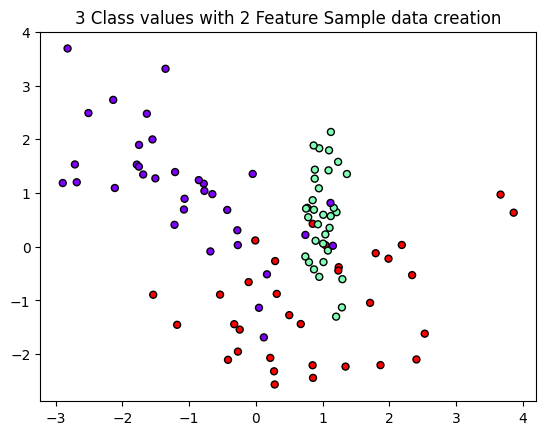

In [54]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Feature Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes =3, n_clusters_per_class=1, random_state=0)
# plot 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c = y_labels, s=25, cmap='rainbow', edgecolor='k')

In [55]:
import numpy as np

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
  fig, ax = plt.subplots()

  #학습 데이터 scatter plot으로 나타내기
  ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k')
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 training 데이터로 model 학습
  model.fit(X,y)
  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx,yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200), np.linspace(ylim_start,ylim_end, num=200))
  # ravel 다차원을 1차원으로 평탄화
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contourf()를 이용하여 class boundary를 visualization 수행
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx,yy,Z,alpha=0.3,
                         levels=np.arange(n_classes +1)-0.5,
                         cmap ='rainbow', clim=(y.min(), y.max()),
                         zorder=1)

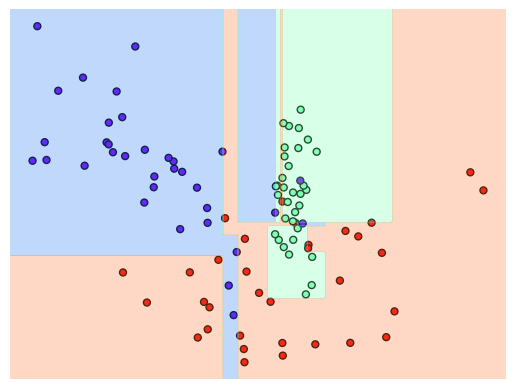

In [56]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

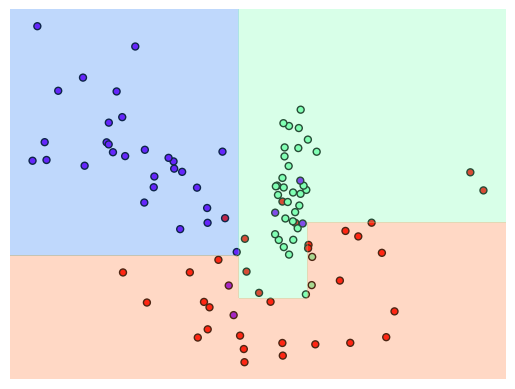

In [57]:
# min_sample_leaf =6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
# min_samples_leaf는 의사 결정 트리(Decision Tree) 알고리즘 1개의 리프 노드가 가져야 하는 최소 샘플 수
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# min_samples_leaf는 과적합을 방지하거나 모델의 일반화 성능을 개선
# 작게 하면 더 복잡, 크게하면 간단한 모델, 적절한 최적의 값을 찾는 것이 중요

### 결정 트리 실습 - Human Activity Recognition

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt.파일에는 피처이름 index와 피처명이 공백으로 분리되어 있음, 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/학교/머신러닝/분류/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_names = feature_name_df.iloc[:,1].values.tolist()
print('전체 feature명에서 10개만 추출:', feature_names[:10])

전체 feature명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [59]:
# 중복된 feature명을 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas의 경우 Duplicate name 에러를 발생.**
**중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [60]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  # feture_dup_df의 index를 reset 시킨다.
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how ='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis =1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [61]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/학교/머신러닝/분류/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/학교/머신러닝/분류/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/학교/머신러닝/분류/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/학교/머신러닝/분류/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/학교/머신러닝/분류/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [62]:
print('##학습 피처 데이터 셋 info()')
print(X_train.info())

##학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [63]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


1 WALKING

2 WALKING_UPSTAIRS

3 WALKING_DOWNSTAIRS

4 SITTING

5 STANDING

6 LAYING

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy =accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}
# GridSearchCV 를 수행하되 accuracy 기준으로, 5 Fold cross-validaion
grid_cv=GridSearchCV(dt_clf, params, cv=5, scoring='accuracy')
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}',format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: {0:.4f} 0.8513444970102249
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [68]:
# GridSearchCV객체의 cv_reaults 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.head()

# max_depth 파라미터 값과 평균 테스트 스코어만 출력
print(cv_results_df[['param_max_depth', 'mean_test_score']])

  param_max_depth  mean_test_score
0               6         0.850791
1               8         0.851069
2              10         0.851209
3              12         0.844135
4              16         0.851344
5              20         0.850800
6              24         0.849440


In [71]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  # 테스트 셋을 이용하여 예측수행
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth ={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth =6 정확도: 0.8558
max_depth =8 정확도: 0.8707
max_depth =10 정확도: 0.8673
max_depth =12 정확도: 0.8646
max_depth =16 정확도: 0.8575
max_depth =20 정확도: 0.8548
max_depth =24 정확도: 0.8548


In [72]:
params = {
    'max_depth': [8,12,16,20],
    'min_samples_split': [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring ='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [74]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


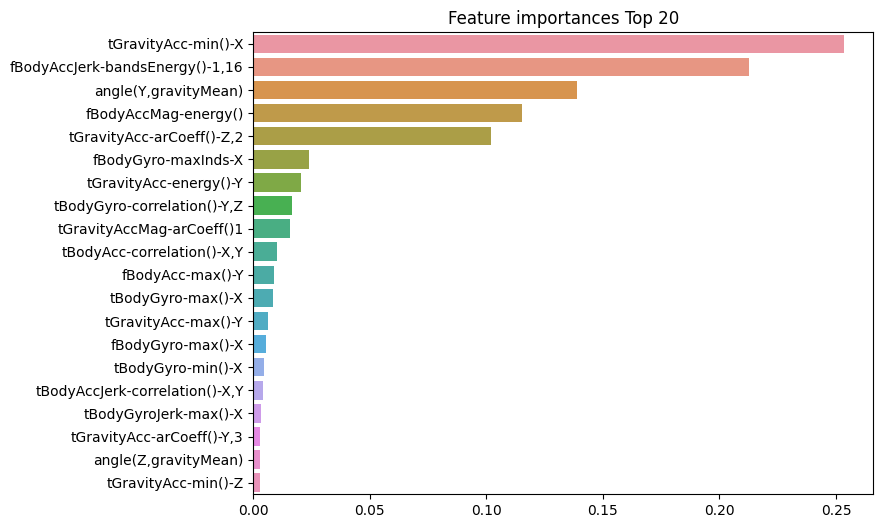

In [76]:
import seaborn as sns
ftr_importances_values = best_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래츠로 쉽게 표현하기 위해 series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 서포트 백터 머신을 사용한 최대 마진 분류

In [77]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]] # petal length 와 petal width 만 가져오기
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('y의 레이블 카운트:', np.bincount(y)) # bincount는 빈도수를 카운트하는 함수
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:' ,np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [94]:
# 표준화 스케일러를 사용한다
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std)) # 배열을 수직 방향으로 쌓아주는 역할
y_combined = np.hstack((y_train, y_test)) # 배열을 수평 방향으로 쌓아주는 역할

In [95]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

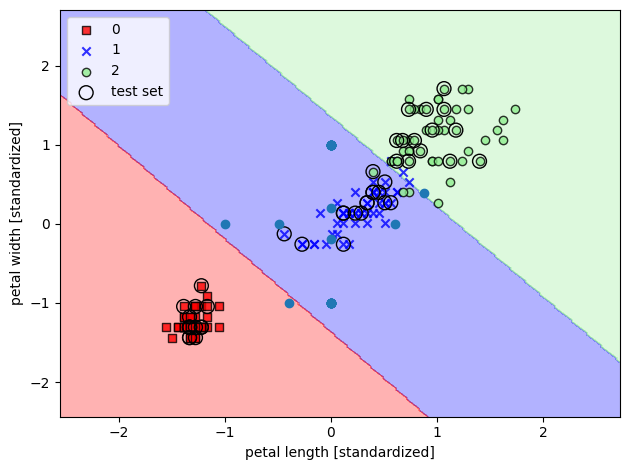

In [96]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C =1.0, random_state = 1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105,150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
svm.coef_

array([[-1.28108835, -1.08908074],
       [-0.68216416, -0.56900015],
       [-2.20580665, -1.9370517 ]])

In [98]:
svm.dual_coef_, svm.dual_coef_.shape

(array([[ 0.88134491,  0.60379849, -1.        , -0.        , -0.        ,
         -0.        , -0.        , -0.4851434 , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.39455455],
        [ 0.39455455,  0.        ,  0.        ,  1.        ,  0.19375927,
          1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         -1.        , -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -0.19375927, -1.        ,
         -1.        ]]),
 (2, 26))

### 커널 SVM을 사용하여 비선형 문제 풀기

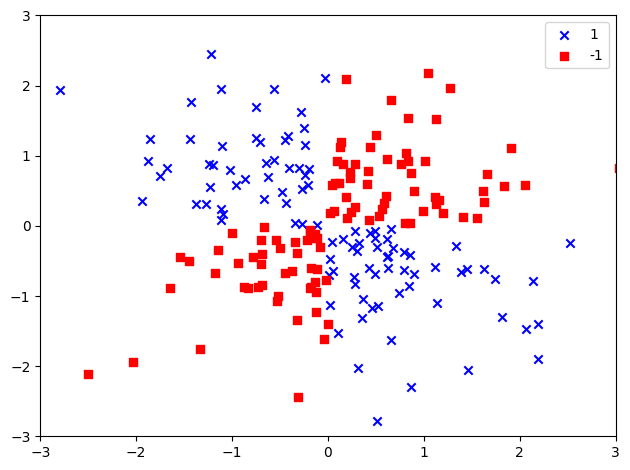

In [101]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c ='b', marker='x', label='1')

plt.scatter(X_xor[y_xor==-1,0],
            X_xor[y_xor==-1,1],
            c ='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

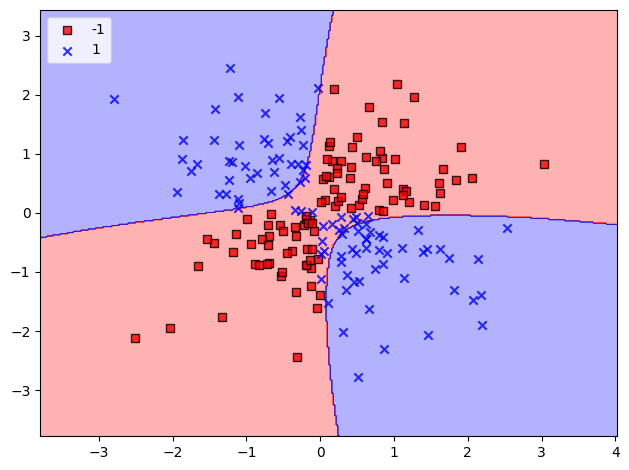

In [102]:
svm = SVC(kernel = 'rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

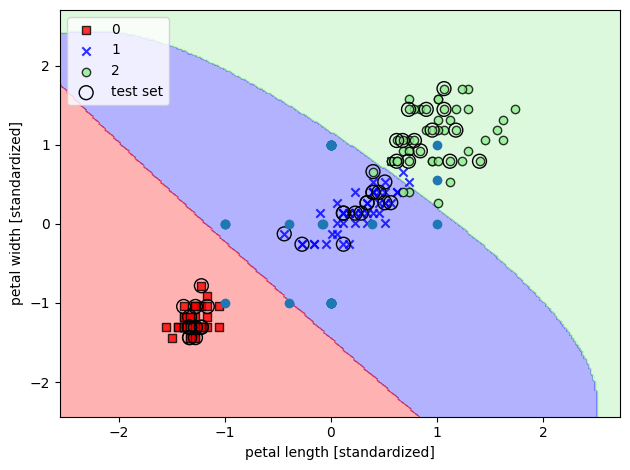

In [103]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

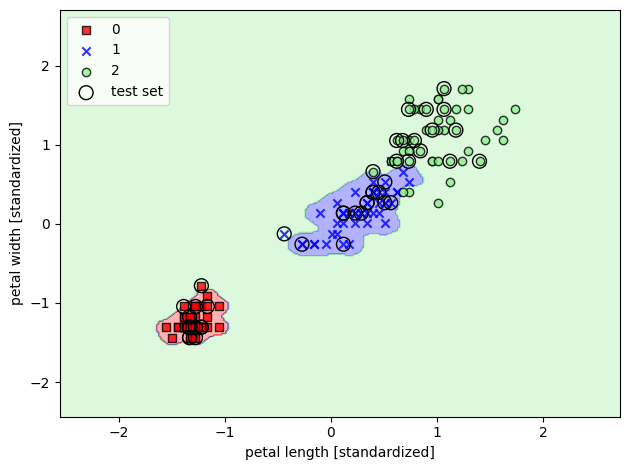

In [104]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### K-최근접 이웃: 게으른 학습 알고리즘

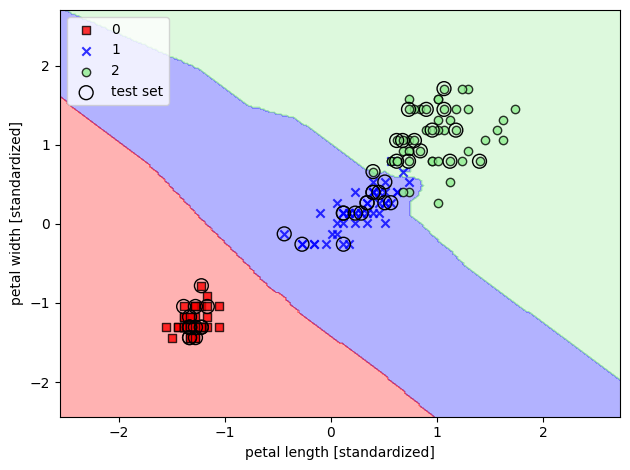

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()